![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Format EddyPro _fluxnet_ output files for upload to FLUXNET database
</b>
</span>

---
**Notebook version**: `4` (27 Feb 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Background**

- Eddypro outputs `_fluxnet_` files
- The files cannot be directly uploaded to the FLUXNET database
- The class `FormatEddyProFluxnetFileForUpload` helps in formatting the files to comply with FLUXNET requirements for data sharing

More info:
- [FLUXNET Requirements for Data Sharing](https://www.swissfluxnet.ethz.ch/index.php/knowledge-base/fluxnet-requirements/)
- [Data submission - General Information](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/general-information)
- [FLUXNET Variables codes](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/variables-codes)

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from diive.pkgs.formats.fluxnet import FormatEddyProFluxnetFileForUpload  # Class to format output files for upload
from diive.core.plotting.heatmap_datetime import HeatmapDateTime  # For plotting heatmaps
from diive.core.plotting.timeseries import TimeSeries  # For simple (interactive) time series plotting
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

Loading BokehJS ...

diive version: v0.70.0


</br>

# **Docstring**

In [2]:
help(FormatEddyProFluxnetFileForUpload)

Help on class FormatEddyProFluxnetFileForUpload in module diive.pkgs.formats.fluxnet:

class FormatEddyProFluxnetFileForUpload(builtins.object)
 |  FormatEddyProFluxnetFileForUpload(site: str, sourcedir: str, outdir: str, add_runid: bool = True)
 |  
 |  Helper class to convert EddyPro _fluxnet_ output files to the file
 |  format required for data upload (data sharing) to FLUXNET
 |  
 |  The class does the following:
 |  - Search source folder for _fluxnet_ files
 |  - Load data from all found files and store in dataframe
 |  - Make subset that contains required variables
 |  - Set missing values to FLUXNET format (-9999)
 |  - Rename variables by adding the FLUXNET suffix (_1_1_1)
 |  - Insert two timestamp columns denoting START and END of averaging interval
 |  - Format the two timestamp columns to FLUXNET format YYYYMMDDhhmm
 |  - Save data from dataframe to yearly files
 |  
 |  - Example notebook available in:
 |      notebooks/Formats/ConvertEddyProFluxnetFileForUpload.ipynb
 

</br>

# **Input and output folders**

In [3]:
SOURCE = r"F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\0-eddypro_fluxnet_files"  # This is the folder where datafiles are searched
OUTDIR = r"F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\1-formatted_for_upload"  # Output yearly CSV to this folder

</br>

# **Format data**

## Initialize

In [4]:
fxn = FormatEddyProFluxnetFileForUpload(
    site='CH-FRU',
    sourcedir=SOURCE,
    outdir=OUTDIR,    
    add_runid=True)


Initiated formatting for datafiles with the following settings:
    site: CH-FRU
    source folder: F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\0-eddypro_fluxnet_files
    output folder: F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\1-formatted_for_upload
    add run ID: True


## Search and merge `_fluxnet_` datafiles

In [5]:
fxn.mergefiles(limit_n_files=None)


Searching for EDDYPRO_FLUXNET_30MIN files with extension .csv andID _fluxnet_ in folder F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\0-eddypro_fluxnet_files ...
    Found 2 files:
   --> F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\0-eddypro_fluxnet_files\eddypro_CH-FRU_FR-20240203-162408_fluxnet_2024-02-04T124104_adv.csv
   --> F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\0-eddypro_fluxnet_files\eddypro_CH-FRU_FR-20240227-140551_fluxnet_2024-02-27T161502_adv.csv
Reading file eddypro_CH-FRU_FR-20240203-162408_fluxnet_2024-02-04T124104_adv.csv ...
Reading file eddypro_CH-FRU_FR-20240227-140551_fluxnet_2024-02-27T161502_adv.csv ...


## Merged dataset

In [6]:
fxn.merged_df

,AIR_CP,AIR_DENSITY,AIR_MV,AIR_RHO_CP,AOA_METHOD,AXES_ROTATION_METHOD,BADM_HEIGHTC,BADM_INSTPAIR_EASTWARD_SEP_GA_CH4,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_H2O,BADM_INSTPAIR_EASTWARD_SEP_GA_NONE,BADM_INSTPAIR_HEIGHT_SEP_GA_CH4,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_H2O,BADM_INSTPAIR_HEIGHT_SEP_GA_NONE,...,W_T_SONIC_COV_IBROM_N0004,W_T_SONIC_COV_IBROM_N0008,W_T_SONIC_COV_IBROM_N0016,W_T_SONIC_COV_IBROM_N0032,W_T_SONIC_COV_IBROM_N0065,W_T_SONIC_COV_IBROM_N0133,W_T_SONIC_COV_IBROM_N0277,W_T_SONIC_COV_IBROM_N0614,W_T_SONIC_COV_IBROM_N1626,W_UNROT,W_U_COV,W_VM97_TEST,W_ZCD,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01 01:15:00,1010.47,1.11807,0.025813,1129.78,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,...,-0.040418,-0.040898,-0.040432,-0.041119,-0.042939,-0.045032,-0.046899,-0.048347,-0.049319,0.053597,-0.095014,800001101.0,177.0,0.046349,0.045559
2023-01-01 01:45:00,1010.68,1.11733,0.025826,1129.26,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,...,0.000856,-0.000887,-0.003470,-0.006210,-0.008133,-0.009251,-0.009937,-0.010338,-0.010540,-0.006849,0.014774,800000111.0,866.0,0.123402,0.120562
2023-01-01 02:15:00,1010.88,1.11842,0.025798,1130.59,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,...,-0.014505,-0.019221,-0.022571,-0.025065,-0.027053,-0.028637,-0.029893,-0.030819,-0.031438,0.035938,-0.042089,800000111.0,396.0,0.087012,0.087433
2023-01-01 02:45:00,1010.24,1.11950,0.025784,1130.96,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,...,0.006716,0.006022,0.004152,0.001699,-0.000755,-0.002752,-0.004236,-0.005289,-0.005953,0.018953,-0.009692,800001111.0,613.0,0.005876,0.009752
2023-01-01 03:15:00,1010.70,1.12057,0.025751,1132.56,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,...,-0.003651,-0.004886,-0.006224,-0.008006,-0.010198,-0.012255,-0.013673,-0.014488,-0.014915,0.018527,-0.009940,800000111.0,447.0,0.446629,0.447279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:45:00,1009.61,1.13365,0.025471,1144.55,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,...,0.001552,-0.000307,-0.002806,-0.005445,-0.007991,-0.010225,-0.011954,-0.013145,-0.013905,0.103308,0.000835,800001111.0,320.0,0.305085,0.309890
2023-12-31 23:15:00,1009.46,1.13574,0.025427,1146.48,0.0,1.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003919,0.002964,0.001499,-0.000092,-0.001669,-0.003031,-0.004101,-0.004874,-0.005363,0.120439,-0.011609,800000111.0,366.0,0.135235,0.134189
2023-12-31 23:45:00,1009.54,1.13475,0.025448,1145.57,0.0,1.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.006085,-0.008239,-0.010877,-0.013890,-0.017037,-0.019891,-0.022171,-0.023783,-0.024765,0.137886,-0.052075,800000111.0,62.0,0.046821,0.046497


## Test for signal strength / AGC

<div class="alert alert-block alert-danger">
    <b>Do not use for H (sensible heat flux).</b> This test is only relevant for fluxes where the concentration was measured by a gas analyzer, e.g. FC, FH2O, LE, ET, N2O, CH4, etc ... 
</div>

In [7]:
FLUXCOLS = ['FC', 'LE']  # Give flux columns as list
SIGNAL_STRENGTH_COL = 'CUSTOM_AGC_MEAN'  # Name of the column storing the signal strength, typically 'CUSTOM_AGC_MEAN' for LI-7500, 'CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN' for LI-7200, or something similar
SIGNAL_STRENGTH_THRESHOLD = 90  # Signal strength threshold, flux values where threshold is exceeded are flagged as rejected
SIGNAL_STRENGTH_METHOD = 'discard above'  # 'discard above' flags fluxes where signal strength > threshold, 'discard below' where signal strength < threshold

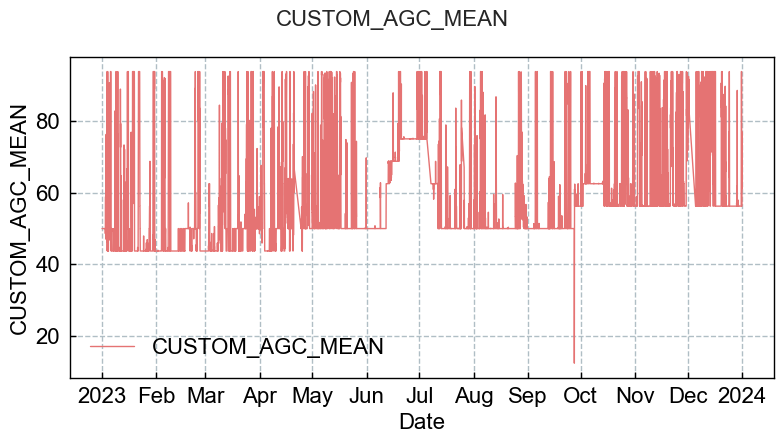

In [8]:
# TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot_interactive()
TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot()

In [9]:
for f in FLUXCOLS:
    fxn.remove_low_signal_data(fluxcol=f,
                               signal_strength_col=SIGNAL_STRENGTH_COL,
                               method=SIGNAL_STRENGTH_METHOD,
                               threshold=SIGNAL_STRENGTH_THRESHOLD)



Removing FC flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_FC_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (good values) where CUSTOM_AGC_MEAN <= 90, flag 2 (bad values) where CUSTOM_AGC_MEAN > 90 ...
CUSTOM_AGC_MEAN rejected 1176 values of FC, all rejected value were removed from the dataset.

Available values of FC before removing low signal fluxes: 15500
Available values of FC after removing low signal fluxes: 14721

Removing all newly generated columns relating to quality check (not needed for FLUXNET), restoring original set of variables ...


Removing LE flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_LE_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 

## Remove problematic time periods
               
Use `REMOVE_DATES` to specify the time period(s) for `VAR` that are removed from the dataset.

For example:

```python
REMOVE_DATES = ['2022-06-30 23:58:30',
                ['2022-06-05 00:00:30', '2022-06-07 14:30:00']]
```
will remove the record for `2022-06-30 23:58:30` and all records between
`2022-06-05 00:00:30` (inclusive) and `2022-06-07 14:30:00` (inclusive).

This also works when providing only the date, e.g.
```python
REMOVE_DATES = [['2006-05-01', '2006-07-18']] 
```
will remove all data points between `2006-05-01` (inclusive) and `2006-07-18` (inclusive).

### Plot affected variables

In [ ]:
# VAR = ['FC', 'LE', 'H', 'USTAR', 'FETCH_70', 'FETCH_90', 'FETCH_MAX']
# for v in VAR:
#     # TimeSeries(series=fxn.merged_df[v]).plot_interactive()
#     TimeSeries(series=fxn.merged_df[v]).plot()

In [ ]:
# # These variables are erroneous during the defined time period
# VAR = ['FC', 'LE', 'H', 'USTAR', 'FETCH_70', 'FETCH_90', 'FETCH_MAX']  
# REMOVE_DATES = [
#     ['2023-03-20', '2023-07-09']
# ]

In [ ]:
# for v in VAR:
#     fxn.remove_erroneous_data(var=v,
#                               remove_dates=REMOVE_DATES,
#                               showplot=True)

In [ ]:
# # These variables are erroneous during the defined time period
# VAR = ['FC', 'LE']  
# REMOVE_DATES = [    
#     ['2017-06-09 00:30', '2017-06-12 11:00'],
#     ['2017-06-12 18:00', '2017-06-16 11:00']
# ]

In [ ]:
# for v in VAR:
#     fxn.remove_erroneous_data(var=v,
#                               remove_dates=REMOVE_DATES,
#                               showplot=True)

## Format data for FLUXNET

In [10]:
fxn.apply_fluxnet_format()


Assembling subset of variables ...
    Found: ['FC', 'FC_SSITC_TEST', 'SC_SINGLE', 'CO2', 'LE', 'LE_SSITC_TEST', 'SLE_SINGLE', 'H2O', 'H', 'H_SSITC_TEST', 'SH_SINGLE', 'USTAR', 'WD', 'WS', 'FETCH_70', 'FETCH_90', 'FETCH_MAX', 'SW_IN_1_1_1', 'TA_1_1_1', 'RH_1_1_1', 'PA_1_1_1', 'LW_IN_1_1_1', 'PPFD_IN_1_1_1']
    Not found: ['G_1_1_1', 'NETRAD_1_1_1', 'TS_1_1_1', 'P_1_1_1', 'SWC_1_1_1']

Setting all missing values to -9999 ...

The following variables are renamed to comply with FLUXNET variable codes:
    RENAMED --> SC_SINGLE was renamed to SC
    RENAMED --> SLE_SINGLE was renamed to SLE
    RENAMED --> SH_SINGLE was renamed to SH

The following variables have been renamed:
    RENAMED --> FC was renamed to FC_1_1_1
    RENAMED --> FC_SSITC_TEST was renamed to FC_SSITC_TEST_1_1_1
    RENAMED --> SC was renamed to SC_1_1_1
    RENAMED --> CO2 was renamed to CO2_1_1_1
    RENAMED --> LE was renamed to LE_1_1_1
    RENAMED --> LE_SSITC_TEST was renamed to LE_SSITC_TEST_1_1_1
    RENAMED 

## Save yearly `CSV` files

In [11]:
fxn.export_yearly_files()


Saving yearly CSV files ...
    --> Saved file F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\1-formatted_for_upload\CH-FRU_2023_fluxes_meteo_20240227.csv.
    --> Saved file F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet_2023\1-formatted_for_upload\CH-FRU_2024_fluxes_meteo_20240227.csv.


</br>

# **Check FLUXNET data**

- The merged file data from all files can be directly returned with `.get_data()`
- Note that the dataframe below does not show exactly how the data look like in the formatted data files, but how data were stored in `diive`, hence the timestamp index `TIMESTAMP_MIDDLE`
- The yearly files do not contain the timestamp index `TIMESTAMP_MIDDLE`

## Dataframe that was used to generate yearly files

In [12]:
data_fluxnet = fxn.get_data()
data_fluxnet

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,FC_SSITC_TEST_1_1_1,SC_1_1_1,CO2_1_1_1,LE_1_1_1,LE_SSITC_TEST_1_1_1,SLE_1_1_1,H2O_1_1_1,H_1_1_1,H_SSITC_TEST_1_1_1,SH_1_1_1,USTAR_1_1_1,WD_1_1_1,WS_1_1_1,FETCH_70_1_1_1,FETCH_90_1_1_1,FETCH_MAX_1_1_1,SW_IN_1_1_1,TA_1_1_1,RH_1_1_1,PA_1_1_1,LW_IN_1_1_1,PPFD_IN_1_1_1
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01 01:15:00,202301010100,202301010130,8.809450,1.0,-9999.000000,421.806,15.34690,1.0,-9999.000000,9.49409,-56.06490,1.0,-9999.000000,0.320943,41.40030,1.175380,88.3488,132.3630,48.3224,0.0,9.665530,72.1233,-9999.0,286.106,0.0
2023-01-01 01:45:00,202301010130,202301010200,0.517521,1.0,0.097841,423.626,4.36286,1.0,0.869577,9.85638,-10.65880,1.0,0.232879,0.133147,50.35350,0.877748,-9999.0000,-9999.0000,-9999.0000,0.0,9.458140,74.1333,-9999.0,293.711,0.0
2023-01-01 02:15:00,202301010200,202301010230,4.013580,1.0,0.072493,424.972,-6.42181,1.0,0.947930,10.25080,-32.87300,1.0,-0.501668,0.217746,63.32660,0.777352,88.0235,131.8750,48.1445,0.0,8.713100,78.7706,-9999.0,291.125,0.0
2023-01-01 02:45:00,202301010230,202301010300,0.934875,2.0,-0.061983,423.822,-19.48870,1.0,-2.811640,9.08186,-1.48132,2.0,-0.336289,0.190298,82.13990,0.634759,-9999.0000,-9999.0000,-9999.0000,0.0,9.149890,70.7845,-9999.0,283.927,0.0
2023-01-01 03:15:00,202301010300,202301010330,2.753760,0.0,0.082713,425.355,-5.32288,0.0,2.012080,9.91704,-18.13270,0.0,-0.479243,0.103525,4.85234,0.749884,-9999.0000,-9999.0000,-9999.0000,0.0,8.387260,78.9141,-9999.0,268.767,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:45:00,202312312230,202312312300,26.361300,1.0,-1.843110,409.434,-16.73440,1.0,-0.878266,8.14766,-20.90080,0.0,-0.964648,0.123623,210.18200,1.814790,-9999.0000,-9999.0000,-9999.0000,0.0,0.024155,99.9980,-9999.0,316.421,0.0
2023-12-31 23:15:00,202312312300,202312312330,-9999.000000,-9999.0,-9999.000000,-9999.000,-9999.00000,-9999.0,2680.170000,-9999.00000,-7.08394,1.0,-0.760936,0.113046,211.30400,1.598680,-9999.0000,-9999.0000,-9999.0000,0.0,-0.291772,99.9980,-9999.0,311.021,0.0
2023-12-31 23:45:00,202312312330,202401010000,-9999.000000,-9999.0,-9999.000000,-9999.000,-9999.00000,-9999.0,-1420.300000,-9999.00000,-27.87130,0.0,0.408804,0.254146,215.43800,2.246580,49.0706,73.5166,26.8392,0.0,0.022694,99.9980,-9999.0,311.211,0.0


In [13]:
data_fluxnet.columns.to_list()

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'FC_1_1_1',
 'FC_SSITC_TEST_1_1_1',
 'SC_1_1_1',
 'CO2_1_1_1',
 'LE_1_1_1',
 'LE_SSITC_TEST_1_1_1',
 'SLE_1_1_1',
 'H2O_1_1_1',
 'H_1_1_1',
 'H_SSITC_TEST_1_1_1',
 'SH_1_1_1',
 'USTAR_1_1_1',
 'WD_1_1_1',
 'WS_1_1_1',
 'FETCH_70_1_1_1',
 'FETCH_90_1_1_1',
 'FETCH_MAX_1_1_1',
 'SW_IN_1_1_1',
 'TA_1_1_1',
 'RH_1_1_1',
 'PA_1_1_1',
 'LW_IN_1_1_1',
 'PPFD_IN_1_1_1']

## Overview of variables and some stats

In [14]:
# print(*data_fluxnet.columns, sep = "\n")
data_fluxnet.describe().T

,count,mean,std,min,25%,50%,75%,max
FC_1_1_1,17520.0,-1598.223044,3663.309059,-9999.0,-15.750075,-2.343625,2.903643,498.94600
FC_SSITC_TEST_1_1_1,17520.0,-1152.333505,3193.757186,-9999.0,0.000000,0.000000,1.000000,2.00000
SC_1_1_1,17520.0,-1381.735273,3450.683815,-9999.0,-0.313384,-0.023207,0.073650,14.46070
CO2_1_1_1,17520.0,-767.024823,3333.165310,-9999.0,414.041250,426.422500,437.102500,892.16100
LE_1_1_1,17520.0,-1746.615229,3858.230335,-9999.0,-9.368758,7.556845,60.774175,1284.36000
LE_SSITC_TEST_1_1_1,17520.0,-1570.108333,3638.699962,-9999.0,0.000000,0.000000,1.000000,2.00000
SLE_1_1_1,17520.0,-308.023266,2433.557555,-33677.9,-0.919112,-0.046219,0.735312,50596.90000
H2O_1_1_1,17520.0,-1559.833807,3643.139360,-9999.0,6.060085,10.318500,15.699650,35.15700
H_1_1_1,17520.0,-270.895307,1644.376395,-9999.0,-12.420900,-0.887937,14.183175,868.12500
H_SSITC_TEST_1_1_1,17520.0,-276.767295,1642.246189,-9999.0,0.000000,0.000000,1.000000,2.00000


## Plot some key variables
- Keep in mind that FLUXNET requires missing values as `-9999` when looking at the plots

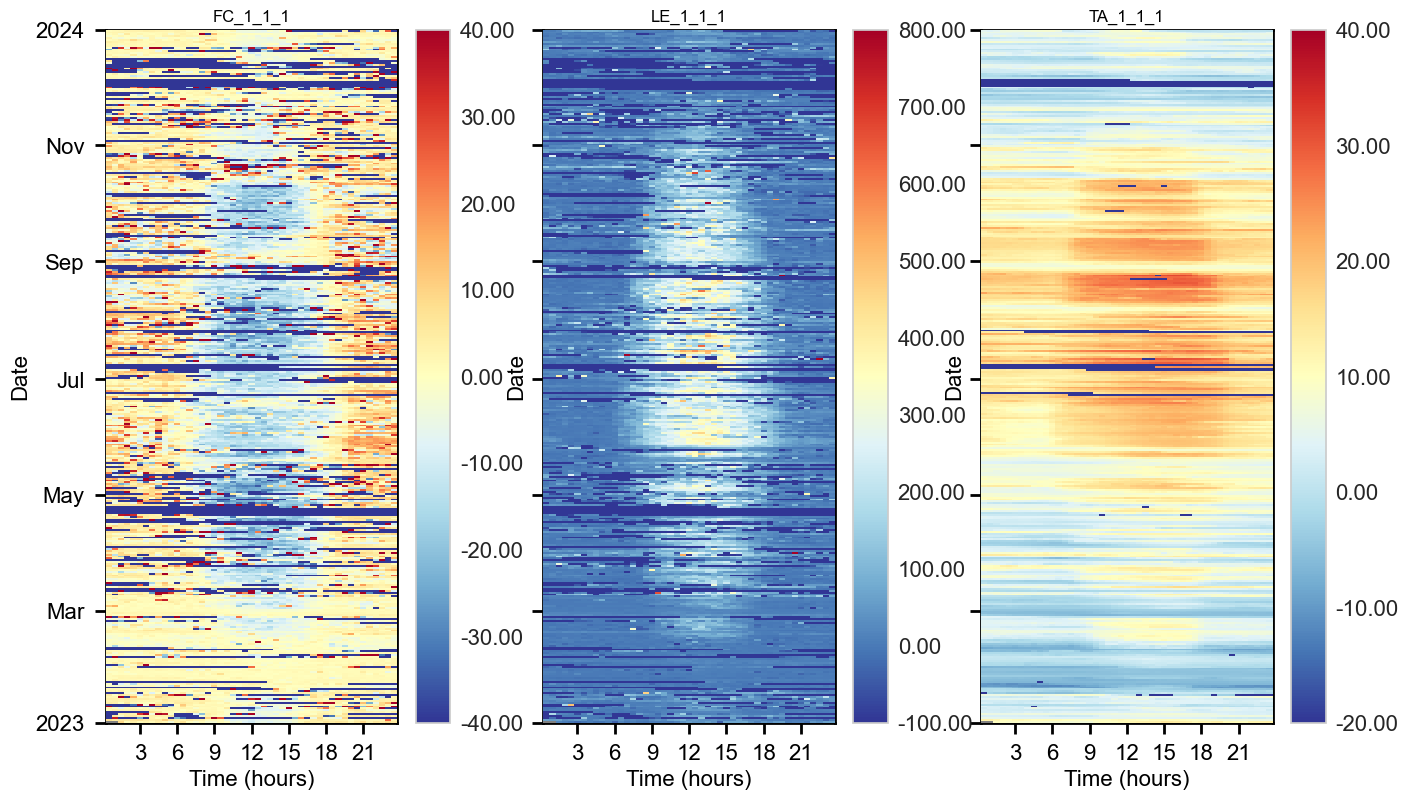

In [15]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
ax_fc = fig.add_subplot(gs[0, 0])
ax_le = fig.add_subplot(gs[0, 1])
ax_ta = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax_fc, series=data_fluxnet['FC_1_1_1'], vmin=-40, vmax=40).plot()
HeatmapDateTime(ax=ax_le, series=data_fluxnet['LE_1_1_1'], vmin=-100, vmax=800).plot()
HeatmapDateTime(ax=ax_ta, series=data_fluxnet['TA_1_1_1'], vmin=-20, vmax=40).plot()
ax_fc.set_title("FC_1_1_1", color='black')
ax_le.set_title("LE_1_1_1", color='black')
ax_ta.set_title("TA_1_1_1", color='black')
ax_le.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

## Plot all variables

C:\Users\holukas\AppData\Local\Temp\ipykernel_19136\1853307846.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='white', figsize=(4, 8))


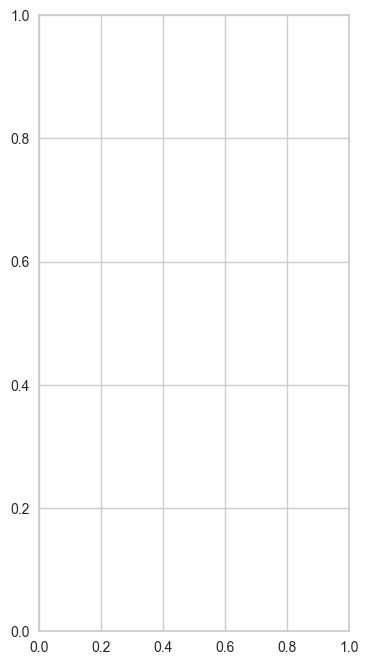

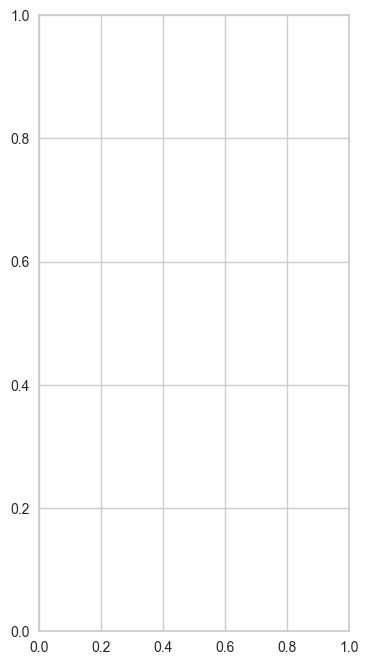

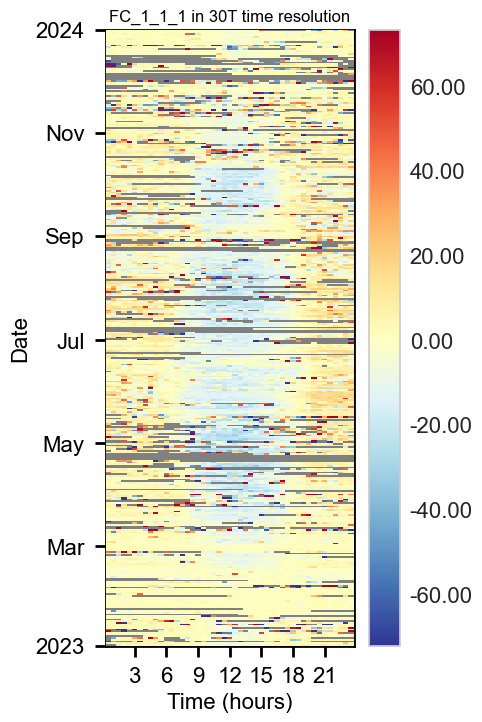

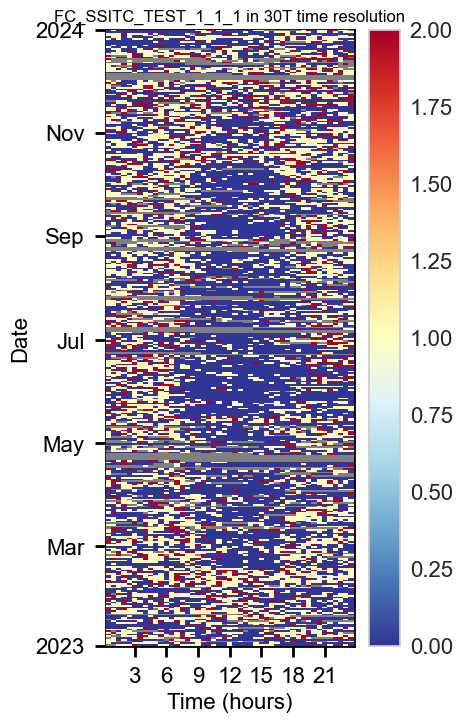

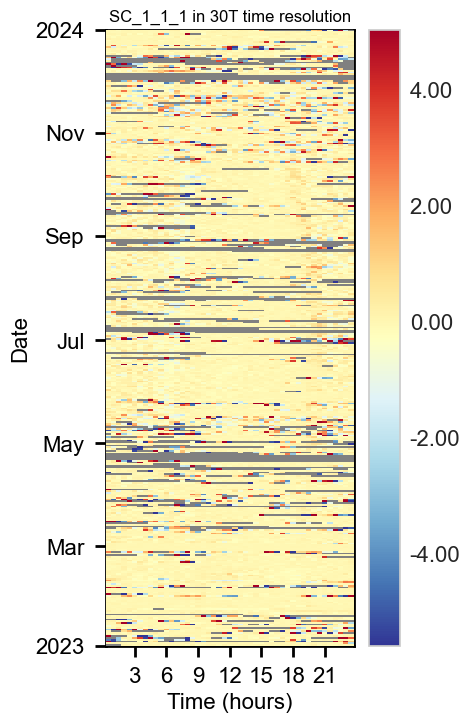

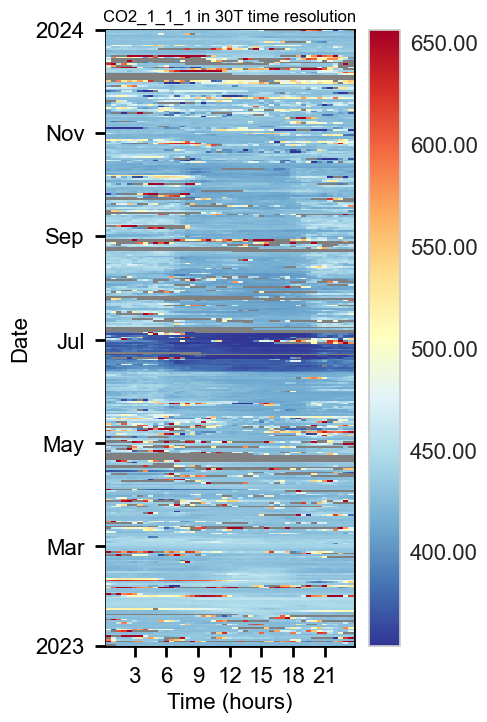

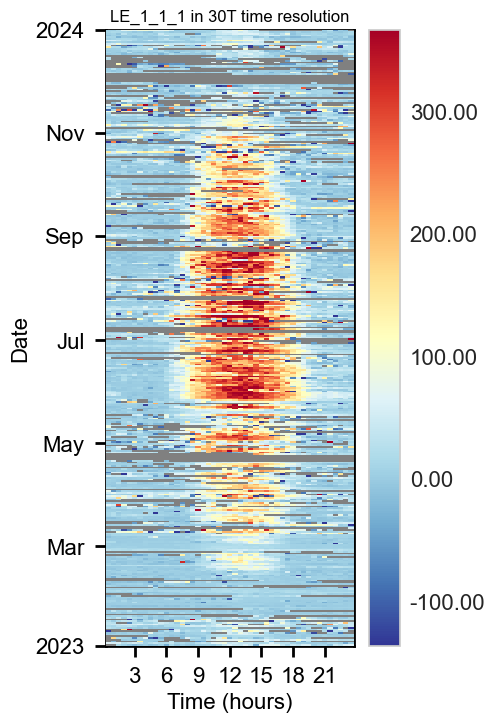

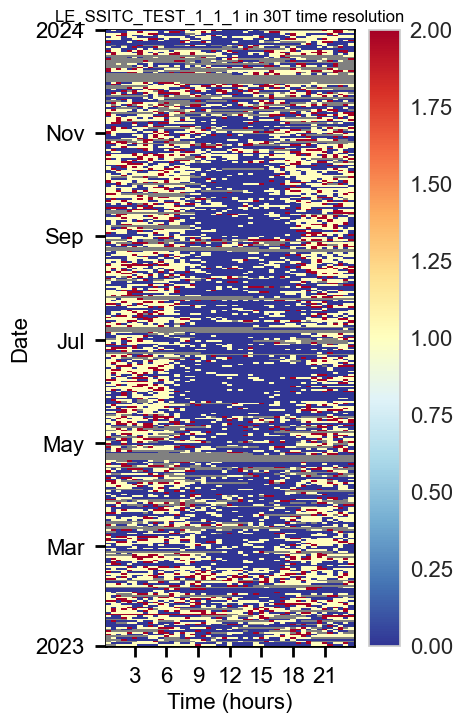

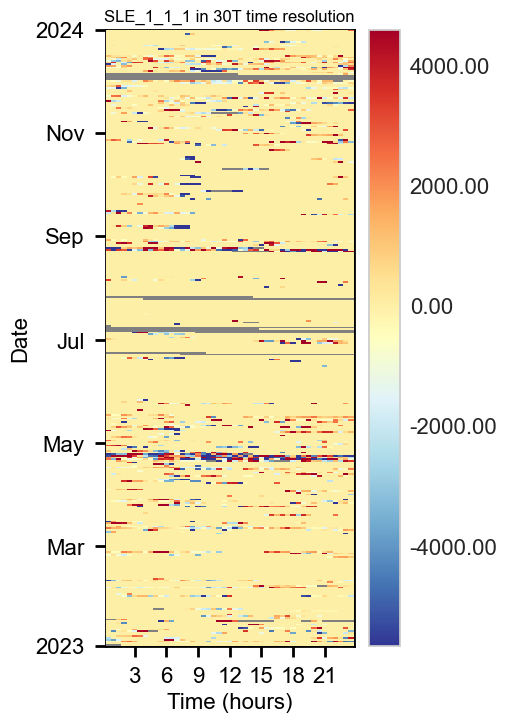

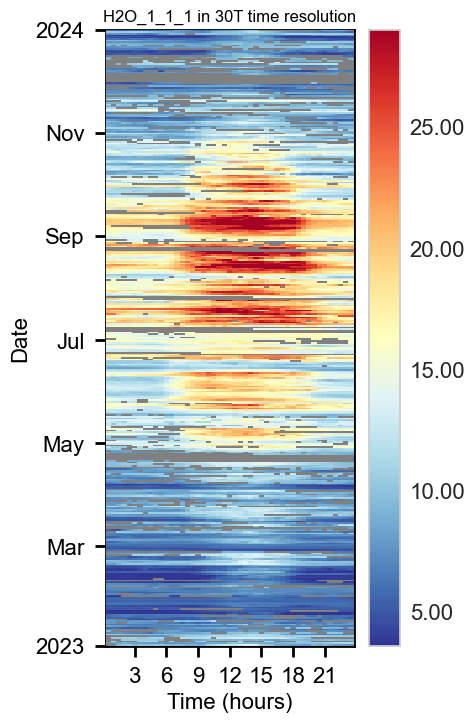

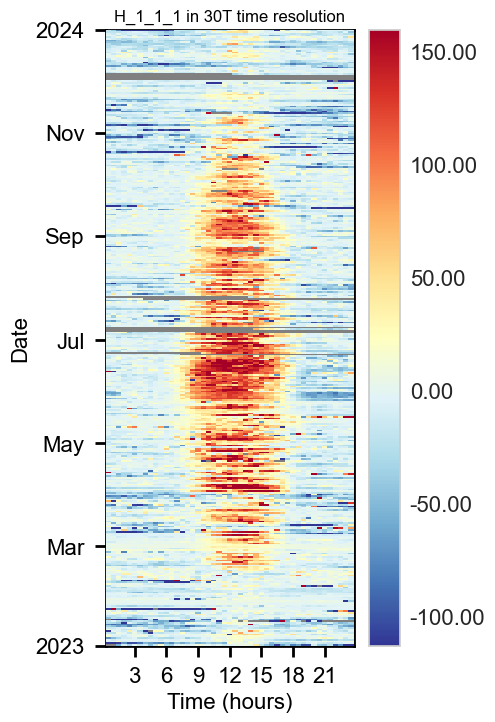

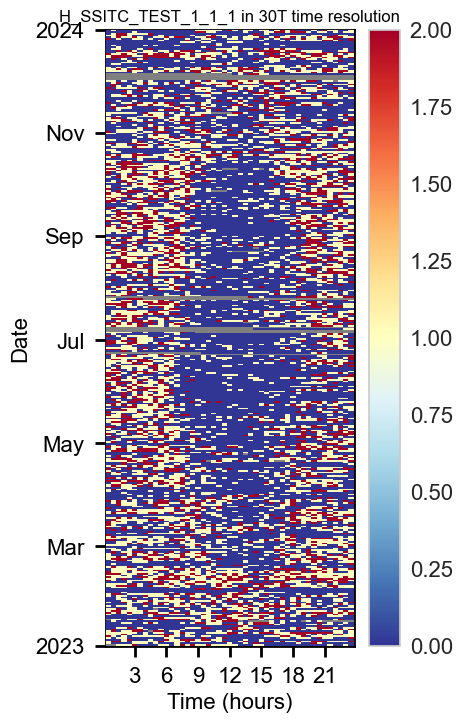

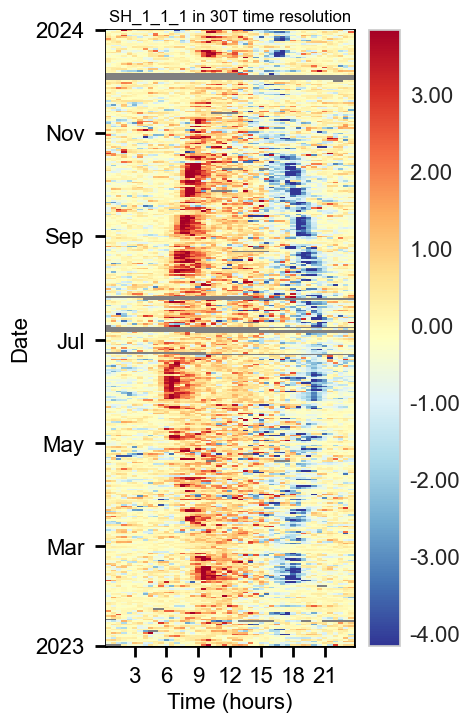

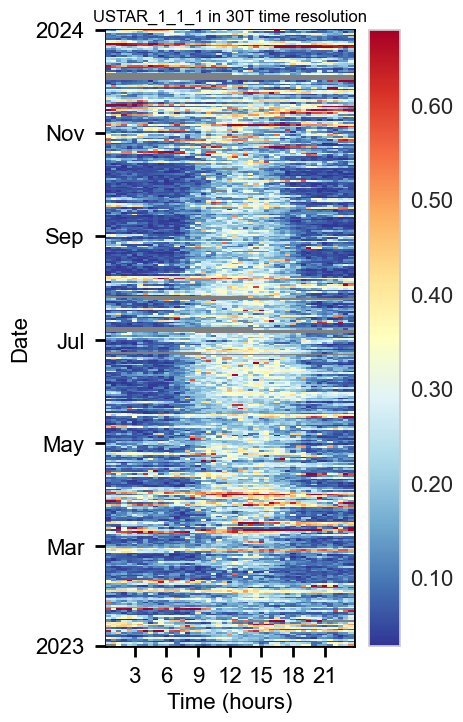

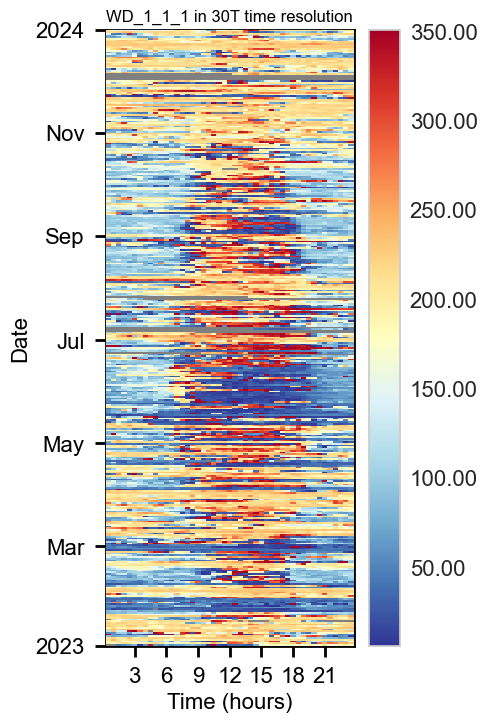

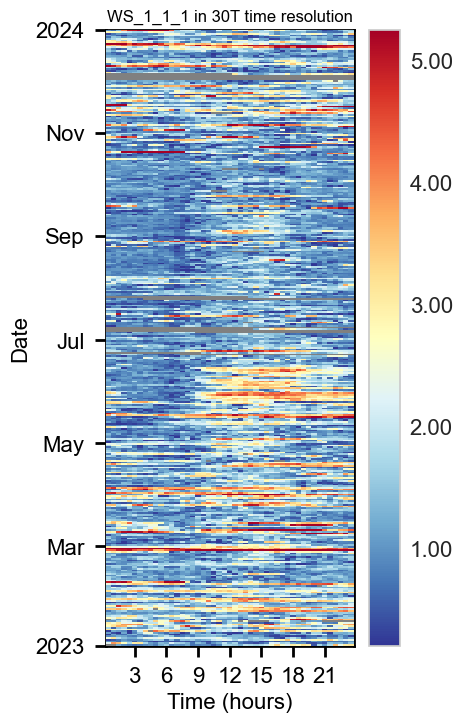

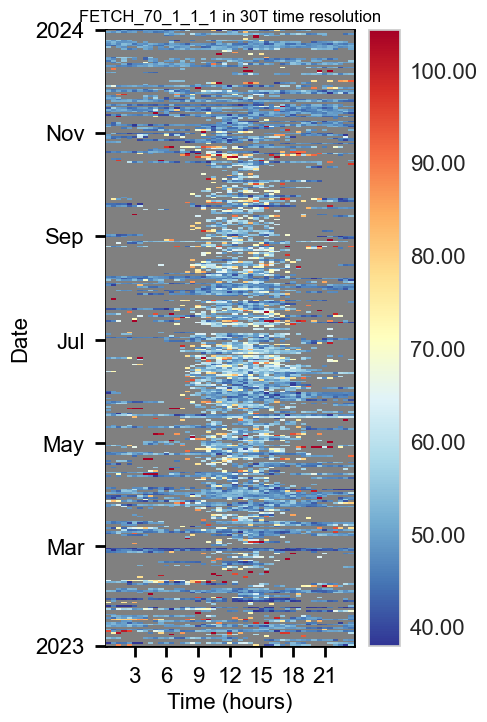

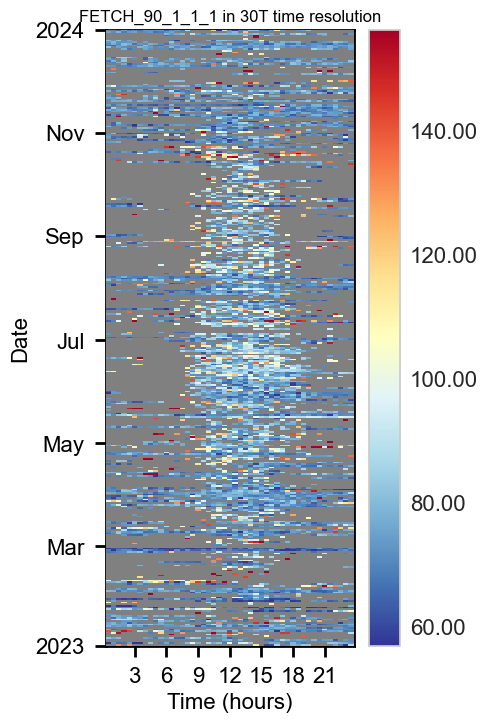

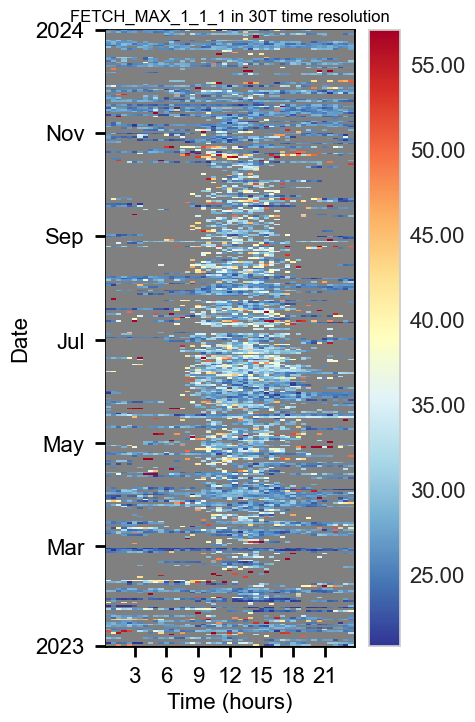

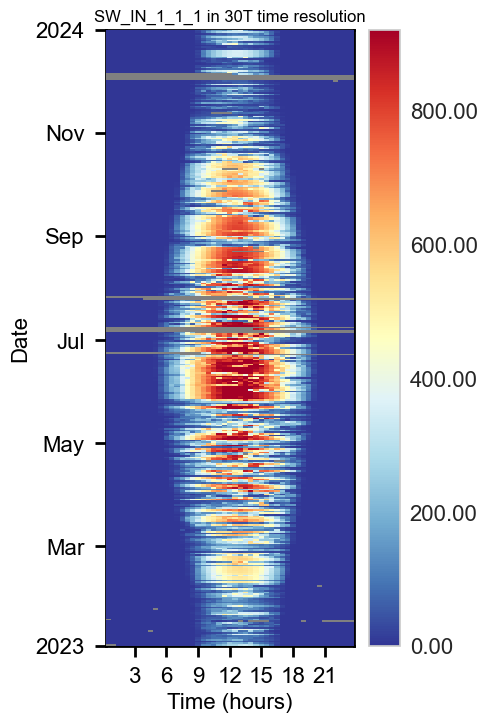

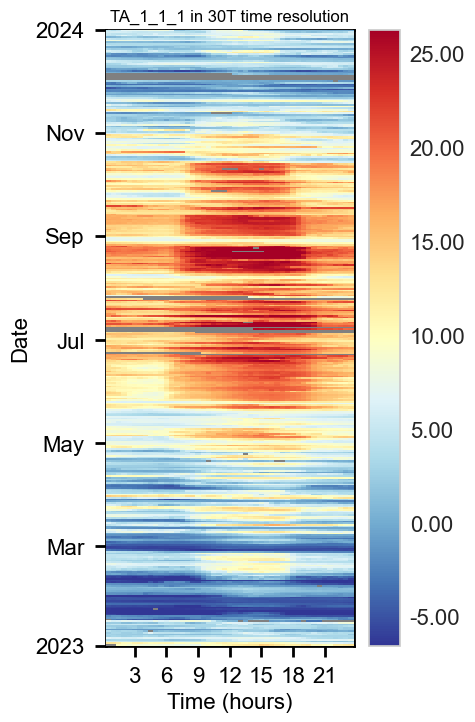

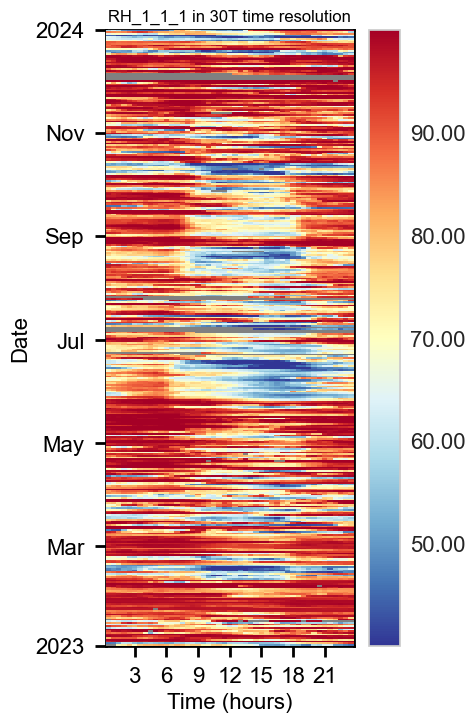

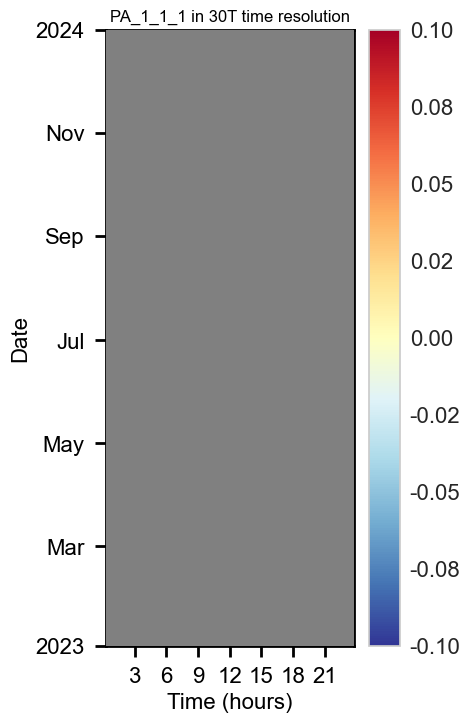

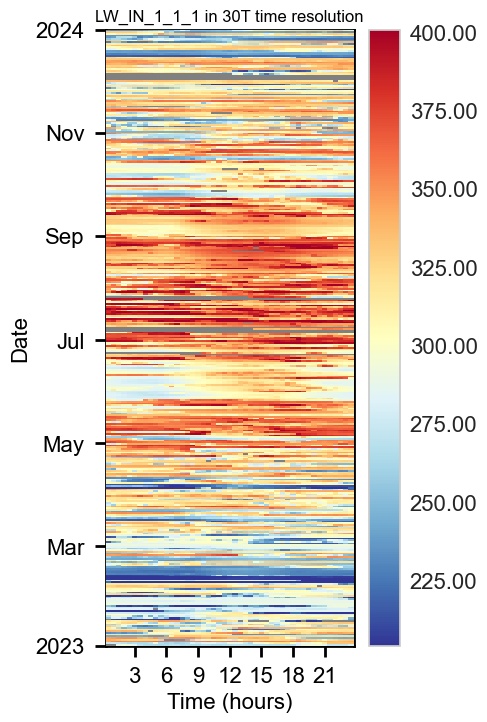

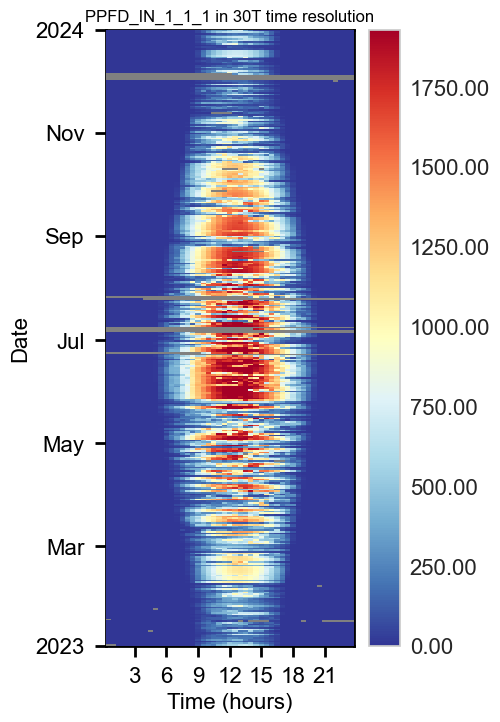

In [16]:
for col in data_fluxnet.columns:
    series = data_fluxnet[col].copy()
    series.replace(to_replace=-9999, value=np.nan, inplace=True)
    try:
        fig = plt.figure(facecolor='white', figsize=(4, 8))
        gs = gridspec.GridSpec(1, 1)  # rows, cols
        ax = fig.add_subplot(gs[0, 0])
        vmin = series.quantile(.01)
        vmax = series.quantile(.99)
        HeatmapDateTime(ax=ax, series=series, vmin=vmin, vmax=vmax).plot()
        ax_fc.set_title(col, color='black')
        fig.show()
    except TypeError:
        pass

</br>

# **End of notebook**

In [17]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-02-27 19:51:37
